# Librerías necesarias

In [ ]:
!pip install -r requirements.txt

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
import random
import pandas as pd

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel



import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
# feed the LDA model into the pyLDAvis instance
#lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

# Ejemplo con Reviews de Asistentes Virtuales

# Lectura de datos

In [ ]:
df = pd.read_csv('./reviews_sample.csv')



In [ ]:
df.head()

,flags,utterance,category,intent
0,BILC,"I don't have an online account, what do I have...",ACCOUNT,create_account
1,BILQZ,can you tell me if i can regisger two accounts...,ACCOUNT,create_account
2,BPLC,"I have no online account, open one, please",ACCOUNT,create_account
3,BIPLD,"could you ask an agent how to open an account,...",ACCOUNT,create_account
4,BLQC,"i want an online account, create one",ACCOUNT,create_account


In [ ]:
df.shape

(21534, 4)

In [ ]:
df = df[['utterance']]
df.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# Preprocesado

Lo hacemos con Gensim por "presentarlo", pero sabéis que opciones hay infinitas

In [ ]:
def text_preprocessing(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)
    return result

In [ ]:
print('Original text:\n{}\n\n'.format(df['utterance'][0]))
print('Processed text:\n{}'.format(text_preprocessing(df['utterance'][0])))

Original text:
I don't have an online account, what do I have to do to register?


Processed text:
['online', 'account', 'register']


In [ ]:
processed_texts = []
for text in df['utterance']:
    processed_texts.append(text_preprocessing(text))

In [ ]:
processed_texts[:10]

[['online', 'account', 'register'],
 ['tell', 'regisger', 'accounts', 'single', 'email', 'address'],
 ['online', 'account', 'open'],
 ['agent', 'open', 'account'],
 ['want', 'online', 'account', 'create'],
 ['want', 'account', 'need', 'help', 'opening'],
 ['tell', 'register', 'online', 'accounts', 'email'],
 ['want', 'know', 'create', 'profiles', 'email', 'address'],
 ['tell', 'create', 'fucking', 'user', 'account', 'email'],
 ['create', 'onlind', 'account']]

## Diccionario id - palabra

In [ ]:
dictionary = Dictionary(processed_texts)

In [ ]:
type(dictionary)

gensim.corpora.dictionary.Dictionary

In [ ]:
list(dictionary.items())

[(0, 'account'),
 (1, 'online'),
 (2, 'register'),
 (3, 'accounts'),
 (4, 'address'),
 (5, 'email'),
 (6, 'regisger'),
 (7, 'single'),
 (8, 'tell'),
 (9, 'open'),
 (10, 'agent'),
 (11, 'create'),
 (12, 'want'),
 (13, 'help'),
 (14, 'need'),
 (15, 'opening'),
 (16, 'know'),
 (17, 'profiles'),
 (18, 'fucking'),
 (19, 'user'),
 (20, 'onlind'),
 (21, 'wanna'),
 (22, 'creae'),
 (23, 'profile'),
 (24, 'creating'),
 (25, 'haven'),
 (26, 'registering'),
 (27, 'like'),
 (28, 'knoe'),
 (29, 'dont'),
 (30, 'profille'),
 (31, 'watn'),
 (32, 'auser'),
 (33, 'oneuser'),
 (34, 'accolunt'),
 (35, 'nkow'),
 (36, 'havent'),
 (37, 'cani'),
 (38, 'accoung'),
 (39, 'creaet'),
 (40, 'creage'),
 (41, 'opem'),
 (42, 'oculd'),
 (43, 'wantto'),
 (44, 'createone'),
 (45, 'cvan'),
 (46, 'regitser'),
 (47, 'rehister'),
 (48, 'haveto'),
 (49, 'suer'),
 (50, 'haev'),
 (51, 'eith'),
 (52, 'knwo'),
 (53, 'hace'),
 (54, 'wannaopen'),
 (55, 'accountg'),
 (56, 'zccount'),
 (57, 'needx'),
 (58, 'oyuy'),
 (59, 'rceate'),
 

In [ ]:
len(dictionary)

1663

## Matriz documento-palabra

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in processed_texts]

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(0, 1), (1, 1), (9, 1)],
 [(0, 1), (9, 1), (10, 1)],
 [(0, 1), (1, 1), (11, 1), (12, 1)],
 [(0, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (2, 1), (3, 1), (5, 1), (8, 1)],
 [(4, 1), (5, 1), (11, 1), (12, 1), (16, 1), (17, 1)],
 [(0, 1), (5, 1), (8, 1), (11, 1), (18, 1), (19, 1)],
 [(0, 1), (11, 1), (20, 1)],
 [(0, 1), (4, 1), (5, 1), (7, 1), (11, 1), (16, 1), (19, 1), (21, 1)],
 [(1, 1), (3, 1), (5, 1), (7, 1), (11, 1)],
 [(0, 1), (11, 1), (19, 1)],
 [(0, 1), (11, 1), (19, 1)],
 [(3, 1), (12, 1), (16, 1)],
 [(22, 1), (23, 1)],
 [(0, 1), (1, 1), (13, 1), (14, 1), (24, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (12, 1), (16, 1), (19, 1)],
 [(0, 1), (9, 1), (12, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (7, 1), (8, 1), (19, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1)],
 [(0, 1), (2, 1), (19, 1), (25, 1)],
 [(0, 1), (11, 1), (12, 1), (14, 1), (19, 1)],
 [(0, 1), (1, 1), (9, 1), (14, 1)],
 [(11, 1), (23, 1)],
 [(2

In [ ]:
corpus[0]

[(0, 1), (1, 1), (2, 1)]

## Entrenamos el modelo (LDA)

In [ ]:
num_topics = 3

lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    iterations=5,
    passes=10,
    alpha='auto'
)

In [ ]:
lda_model.show_topics()

[(0,
  '0.167*"agent" + 0.069*"check" + 0.058*"fucking" + 0.054*"status" + 0.047*"wanna" + 0.040*"view" + 0.038*"account" + 0.033*"purchase" + 0.030*"like" + 0.025*"change"'),
 (1,
  '0.137*"want" + 0.086*"refund" + 0.085*"reimbursement" + 0.048*"tell" + 0.044*"obtain" + 0.043*"request" + 0.038*"service" + 0.037*"cancelled" + 0.037*"postponed" + 0.032*"know"'),
 (2,
  '0.109*"payment" + 0.072*"help" + 0.054*"error" + 0.048*"issue" + 0.048*"problem" + 0.043*"inform" + 0.043*"notify" + 0.042*"report" + 0.042*"card" + 0.039*"order"')]

In [ ]:
word_dict = {};
for i in range(num_topics):
    words = lda_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03
0,agent,want,payment
1,check,refund,help
2,fucking,reimbursement,error
3,status,tell,issue
4,wanna,obtain,problem
5,view,request,inform
6,account,service,notify
7,purchase,cancelled,report
8,like,postponed,card
9,change,know,order


## Perplexity y Coherence

In [ ]:
# Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # Medida de qué tan bueno es el modelo. Cuanto más bajo, mejor

# Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualizar los topics

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.338492 -0.171414       1        1  36.812414
1     -0.329927 -0.185119       2        1  32.803660
0     -0.008565  0.356533       3        1  30.383926, topic_info=               Term         Freq        Total Category  logprob  loglift
10            agent  4224.000000  4224.000000  Default  30.0000  30.0000
12             want  3737.000000  3737.000000  Default  29.0000  29.0000
1231        payment  3328.000000  3328.000000  Default  28.0000  28.0000
1496         refund  2344.000000  2344.000000  Default  27.0000  27.0000
1494  reimbursement  2324.000000  2324.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
441    cancellation   163.787163   166.307305   Topic3  -5.0372   1.1760
869         invoice   492.939088   599.919924   Topic3  -3.9353   0.9948
11           create   188.043693   230.007937   Topic3  -4.8991   0.9898
294     information   402.013642  1020.657780   Topic3  -4.1392   0.2595
1053          order   480.361996  1657.917443   Topic3  -3.9612  -0.0475

[142 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.007192   account
0         2  0.001027   account
0         3  0.992554   account
3         2  0.985385  accounts
4         2  0.999529   address
...     ...       ...       ...
445       3  0.999091      view
21        2  0.010831     wanna
21        3  0.988960     wanna
12        2  0.999532      want
12        3  0.000268      want

[156 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [ ]:
pyLDAvis.save_html(vis, './topics_vis_0.html')

## Número óptimo de topics

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        
        # Build LDA model
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=num_topics)
        
        # Create a list of LDA models
        model_list.append(model)
        
        # Compute the Coherence for each model
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Grid sobre el número de topics (puede tardar un buen rato)

In [ ]:
start_ = 3
end_ = 14
step_ = 1

In [ ]:
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=processed_texts,
    start=start_,
    limit=end_,
    step=step_
)

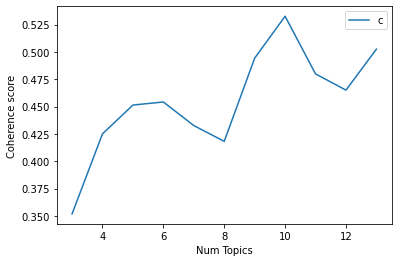

In [ ]:
x = range(start_, end_, step_)
plt.plot(x, coherence_values)
plt.xlabel('Num Topics')
plt.ylabel('Coherence score')
plt.legend(('coherence_values'), loc='best')
plt.show()

In [ ]:
optimal_model_id = -1

optimal_model = model_list[optimal_model_id]

word_dict = {};
for i in range(0, optimal_model.num_topics , 1):
    words = optimal_model.show_topic(i, topn = 20)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13
0,error,want,check,address,agent,help,status,information,fucking,complaint,issue,delivery,reimbursement
1,charged,refund,want,refund,payment,making,track,modify,tell,consumer,problem,options,refund
2,payment,payment,know,reimbursement,notify,need,order,change,payment,happy,payment,ticket,obtain
3,message,obtain,view,shipping,solve,payment,tell,want,talk,lodge,trying,payment,request
4,card,request,reimbursement,policy,inform,order,purchase,shipping,refund,file,paying,help,postponed
5,order,reimbursement,receive,service,paying,informing,want,order,view,receive,report,dont,cancelled
6,tried,notify,refund,money,report,card,newsletter,purchase,human,submit,inform,human,wanna
7,attempted,invoices,policy,cancelled,reimbursement,inform,product,update,understand,comment,notify,helping,event
8,online,solve,invoice,tell,policy,reporting,item,edit,helping,opinion,issues,wanna,game
9,notify,report,money,guarantee,refund,notifying,purchased,policy,problem,review,problems,shipping,concert


# Topic dominante por texto

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=processed_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.5021,"complaint, consumer, happy, lodge, file, recei...","[online, account, register]"
1,1,3.0,0.3117,"address, refund, reimbursement, shipping, poli...","[tell, regisger, accounts, single, email, addr..."
2,2,9.0,0.5047,"complaint, consumer, happy, lodge, file, recei...","[online, account, open]"
3,3,4.0,0.4357,"agent, payment, notify, solve, inform, paying,...","[agent, open, account]"
4,4,1.0,0.8154,"want, refund, payment, obtain, request, reimbu...","[want, online, account, create]"
5,5,5.0,0.4313,"help, making, need, payment, order, informing,...","[want, account, need, help, opening]"
6,6,11.0,0.4287,"delivery, options, ticket, payment, help, dont...","[tell, register, online, accounts, email]"
7,7,2.0,0.4596,"check, want, know, view, reimbursement, receiv...","[want, know, create, profiles, email, address]"
8,8,8.0,0.8681,"fucking, tell, payment, talk, refund, view, hu...","[tell, create, fucking, user, account, email]"
9,9,11.0,0.7692,"delivery, options, ticket, payment, help, dont...","[create, onlind, account]"


# Documento más representativo por topic

In [ ]:
sent_topics_sorteddf_lda = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_lda = pd.concat([
        sent_topics_sorteddf_lda,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.8974,"error, charged, payment, message, card, order,...","[error, message, tried, payment, card, charged..."
1,1.0,0.8462,"want, refund, payment, obtain, request, reimbu...","[want, user, account, want, create]"
2,2.0,0.8681,"check, want, know, view, reimbursement, receiv...","[want, know, number, contact, customer, service]"
3,3.0,0.8846,"address, refund, reimbursement, shipping, poli...","[tell, register, useer, account, single, email..."
4,4.0,0.8462,"agent, payment, notify, solve, inform, paying,...","[mind, asking, agent, orders, theit]"
5,5.0,0.8846,"help, making, need, payment, order, informing,...","[changed, mind, need, hewlp, closing, user, ac..."
6,6.0,0.8462,"status, track, order, tell, purchase, want, ne...","[want, track, orders, tell, wherei]"
7,7.0,0.8681,"information, modify, change, want, shipping, o...","[want, request, information, downloading, some..."
8,8.0,0.8681,"fucking, tell, payment, talk, refund, view, hu...","[tell, create, fucking, user, account, email]"
9,9.0,0.8681,"complaint, consumer, happy, lodge, file, recei...","[tell, register, user, account, single, emai]"


# Distribución de topics en el corpus

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), num_topics)
df_topic_contribution = pd.DataFrame({'topic': topic_contribution.index, 'contribution': topic_contribution})
df_topic_contribution.reset_index(drop=True, inplace=True)

# Show
df_topic_contribution

,topic,contribution
0,10.0,0.185
1,2.0,0.096
2,12.0,0.090
3,9.0,0.087
4,7.0,0.078
5,0.0,0.072
6,11.0,0.067
7,6.0,0.066
8,3.0,0.066
9,5.0,0.063


# Ejemplo con el dataset 20 newsgroup

Dataset muy utilizado en NLP para entrenamiento y validación de modelos de clasificación, clustering y topic modeling. Contiene miles de artículos sobre 20 temas distintos divididos en entrenamiento y test.

Algunos temas están muy  relacionados entre sí mientras que otros son muy distintos.

http://qwone.com/~jason/20Newsgroups/

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

def twenty_newsgroup_to_csv():
    newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

    df = pd.DataFrame([newsgroups_train.data, newsgroups_train.target.tolist()]).T
    df.columns = ['text', 'target']

    targets = pd.DataFrame( newsgroups_train.target_names)
    targets.columns=['title']

    out = pd.merge(df, targets, left_on='target', right_index=True)
    out['date'] = pd.to_datetime('now')
    out.to_csv('20_newsgroup.csv')
    
twenty_newsgroup_to_csv()

In [ ]:
df_newsgroup = pd.read_csv('./20_newsgroup.csv')
df_newsgroup


,Unnamed: 0,text,target,title,date
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2023-02-23 22:40:58.615760
1,17,I recently posted an article asking what kind ...,7,rec.autos,2023-02-23 22:40:58.615760
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2023-02-23 22:40:58.615760
3,56,an excellent automatic can be found in the sub...,7,rec.autos,2023-02-23 22:40:58.615760
4,64,: Ford and his automobile. I need information...,7,rec.autos,2023-02-23 22:40:58.615760
...,...,...,...,...,...
11309,11210,Secrecy in Clipper Chip\n\nThe serial number o...,11,sci.crypt,2023-02-23 22:40:58.615760
11310,11217,Hi !\n\nI am interested in the source of FEAL ...,11,sci.crypt,2023-02-23 22:40:58.615760
11311,11243,"The actual algorithm is classified, however, t...",11,sci.crypt,2023-02-23 22:40:58.615760
11312,11254,\n\tThis appears to be generic calling upon th...,11,sci.crypt,2023-02-23 22:40:58.615760


In [ ]:
df_newsgroup.dropna(subset=['text'], inplace=True)

In [ ]:
df_newsgroup.shape

(11096, 5)

In [ ]:
set(df_newsgroup['target'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [ ]:
set(df_newsgroup['title'])

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [ ]:

processed_texts_newsgroup = []
for text in df_newsgroup['text']:
    processed_texts_newsgroup.append(text_preprocessing(text))

In [ ]:
processed_texts_newsgroup[0]

['wondering',
 'enlighten',
 'door',
 'sports',
 'looked',
 'late',
 'early',
 'called',
 'bricklin',
 'doors',
 'small',
 'addition',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'tellme',
 'model',
 'engine',
 'specs',
 'years',
 'production',
 'history',
 'info',
 'funky',
 'looking',
 'mail']

## Diccionario id-palabra y matrix documento-término

In [ ]:
dictionary_newsgroup = Dictionary(processed_texts_newsgroup)
corpus_newsgroup = [dictionary_newsgroup.doc2bow(doc) for doc in processed_texts_newsgroup]

## LDA

In [ ]:
num_topics = 5

lda_model_newsgroup = LdaModel(
    corpus=corpus_newsgroup,
    id2word=dictionary_newsgroup,
    num_topics=num_topics,
    passes=10
)

In [ ]:
set(df_newsgroup['title'])

{'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'}

In [ ]:
word_dict = {};
for i in range(num_topics):
    words = lda_model_newsgroup.show_topic(i, topn = 15)
    word_dict['Topic #' + '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05
0,like,government,file,nrhj,people
1,encryption,people,available,istanbul,think
2,chip,president,program,cancer,like
3,know,stephanopoulos,anonymous,water,know
4,clipper,state,information,wwiz,time
5,keys,public,internet,medical,good
6,need,jesus,space,appears,going
7,windows,rights,data,patients,said
8,time,states,mail,captain,year
9,thanks,right,version,gizw,believe


In [ ]:
# Perplexity
print('\nPerplexity: ', lda_model_newsgroup.log_perplexity(corpus_newsgroup))

# Coherence Score
coherence_model_lda_newsgroup = CoherenceModel(model=lda_model_newsgroup, texts=processed_texts_newsgroup, dictionary=dictionary_newsgroup, coherence='c_v')
coherence_lda_newsgroup = coherence_model_lda_newsgroup.get_coherence()
print('\nCoherence Score: ', coherence_lda_newsgroup)

## Visualización

In [ ]:

# Visualizar los topics
pyLDAvis.enable_notebook()
vis_newsgroup = gensimvis.prepare(lda_model_newsgroup, corpus_newsgroup, dictionary_newsgroup)
vis_newsgroup

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.115139 -0.153272       1        1  32.913859
0     -0.118205  0.102581       2        1  23.198446
1     -0.091776 -0.126428       3        1  22.226096
2     -0.025449  0.210674       4        1  17.602270
3      0.350569 -0.033556       5        1   4.059328, topic_info=             Term         Freq        Total Category  logprob  loglift
411          chip  1400.000000  1400.000000  Default  30.0000  30.0000
1282   government  1776.000000  1776.000000  Default  29.0000  29.0000
46624  encryption  1550.000000  1550.000000  Default  28.0000  28.0000
4749         file  1538.000000  1538.000000  Default  27.0000  27.0000
14548     clipper  1107.000000  1107.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
7238      appears    50.407722   249.103552   Topic5  -6.5360   1.6064
7554     symptoms    28.571458    39.406411   Topic5  -7.1037   2.8826
100         cover    42.511974   247.361271   Topic5  -6.7063   1.4431
3837         dept    28.905320    58.910161   Topic5  -7.0921   2.4922
19636     bullets    27.957688    52.621133   Topic5  -7.1254   2.5717

[367 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
1640       2  0.744282          access
1640       3  0.082371          access
1640       4  0.172097          access
7869       1  0.990323            adam
4974       1  0.026465  administration
...      ...       ...             ...
27         1  0.648651           years
27         2  0.113759           years
27         3  0.198890           years
27         4  0.039175           years
24232      5  0.985047           yeast

[690 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 2, 3, 4])

In [ ]:
pyLDAvis.save_html(vis, './topics_vis_newsgroups_0.html')

## Topic dominante por documento

In [ ]:
df_topic_sents_keywords_newsgroup = format_topics_sentences(ldamodel=lda_model_newsgroup, corpus=corpus_newsgroup, texts=processed_texts_newsgroup)

# Format
df_dominant_topic_newsgroup = df_topic_sents_keywords_newsgroup.reset_index()
df_dominant_topic_newsgroup.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic_newsgroup.head(10)

In [ ]:
sent_topics_sorteddf_lda_newsgroup = pd.DataFrame()

sent_topics_outdf_grpd_newsgroup = df_topic_sents_keywords_newsgroup.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd_newsgroup:
    sent_topics_sorteddf_lda_newsgroup = pd.concat([
        sent_topics_sorteddf_lda_newsgroup,
        grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
        axis=0)

# Reset Index    
sent_topics_sorteddf_lda_newsgroup.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_lda_newsgroup.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_lda_newsgroup